In [1]:
import pandas as pd

In [2]:
train_data = pd.read_csv('../dataset/train.csv')

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4312358 entries, 0 to 4312357
Data columns (total 5 columns):
 #   Column       Dtype  
---  ------       -----  
 0   date         int64  
 1   id           int64  
 2   type         int64  
 3   temperature  float64
 4   target       float64
dtypes: float64(2), int64(3)
memory usage: 164.5 MB


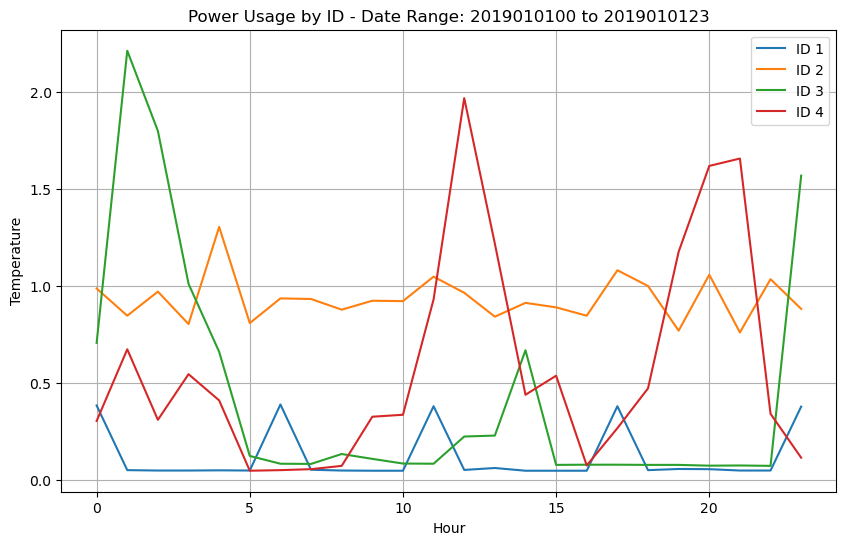

In [4]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named "df"
selected_ids = [1, 2, 3, 4]
start_date = 2019010100
end_date = 2019010123

# Select rows with ID 1 or ID 2 within the specified date range
selected_rows = train_data[(train_data['id'].isin(selected_ids)) & (train_data['date'].between(start_date, end_date))]

# Group the selected rows by ID
grouped_data = selected_rows.groupby('id')

# Plotting the line graphs
plt.figure(figsize=(10, 6))  # Adjust the figure size as per your preference

# Iterate over each ID group and plot the line graph
for group_id, group_df in grouped_data:
    # Extract the last two digits of the date (hour)
    x_values = group_df['date'] % 100
    plt.plot(x_values, group_df['temperature'], label=f'ID {group_id}')

plt.xlabel('Hour')
plt.ylabel('Temperature')
plt.title('Power Usage by ID - Date Range: 2019010100 to 2019010123')
plt.legend()
plt.grid(True)
plt.show()